In [1]:
import pandas as pd
import numpy as np
import scipy as st
import matplotlib as plt
import seaborn as sns

# Data Preparation

In [2]:
house = pd.read_csv(r"D:\Bootcamp data scientist\Final Project\Template Project\Template Project Data Science\Case Study 02\train_house.csv")
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
#Mengecek kolom
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Deskripsi data

In [4]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
hs=house['HouseStyle']
hs

0       2Story
1       1Story
2       2Story
3       2Story
4       2Story
         ...  
1455    2Story
1456    1Story
1457    2Story
1458    1Story
1459    1Story
Name: HouseStyle, Length: 1460, dtype: object

# Data Cleaning

# Mendeteksi adanya missing value

In [6]:
total=house.isnull().sum().sort_values(ascending=False)
percent=(house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


# Membuang variabel yang ada NaN

In [7]:
house=house.dropna(axis=1)
house

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Setelah Variabel yang memiliki NaN dibuang, tersisa 62 variabel data

# Mengelompokkan variabel kategori dan numerik

In [8]:
num_cols=house._get_numeric_data().columns
hn=house[num_cols]
hn

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


Terdapat 35 variabel numerik

In [9]:
hc=house.drop(num_cols, axis=1)
hc

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,CBlock,GasA,Gd,Y,Gd,Typ,Y,WD,Normal


Terdapat 27 variabel kategorikal

# Visualisasi Data

Visualisasi Variabel Kategorik Utilities, HouseStyle, dan ExterQual dengan Barplot

In [10]:
hc['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

<Axes: xlabel='Utilities', ylabel='proportion'>

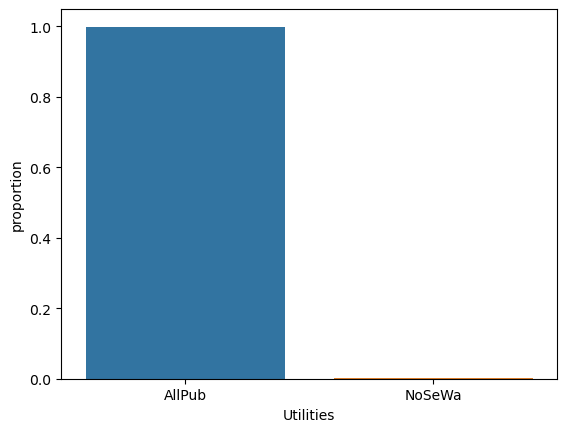

In [11]:
sns.barplot(x=hc['Utilities'].value_counts().index,y=hc['Utilities'].value_counts(normalize=True))

Data kategorikal tersebut sangat imbalanced, karena hampir keseluruhan data berada pada kategori AllPub, dan hampir tidak ada yang NoSeWa

In [12]:
hc['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

<Axes: xlabel='HouseStyle', ylabel='proportion'>

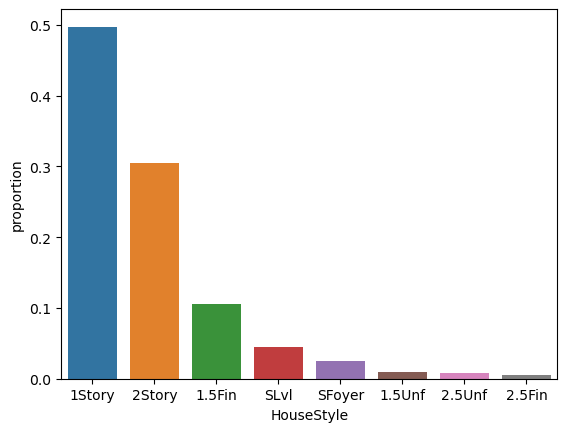

In [13]:
sns.barplot(x=hc['HouseStyle'].value_counts().index,y=hc['HouseStyle'].value_counts(normalize=True))

Porsi terbanyak berdasarkan output di atas adalah kelompok 1Story. Kelompok dengan porsi terkecil adalah 2.5Fin. Meskipun demikian, data kategorical tersebut lebih balance daripada variabel yang sebelumnya diuji

In [14]:
hc['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

<Axes: xlabel='ExterQual', ylabel='proportion'>

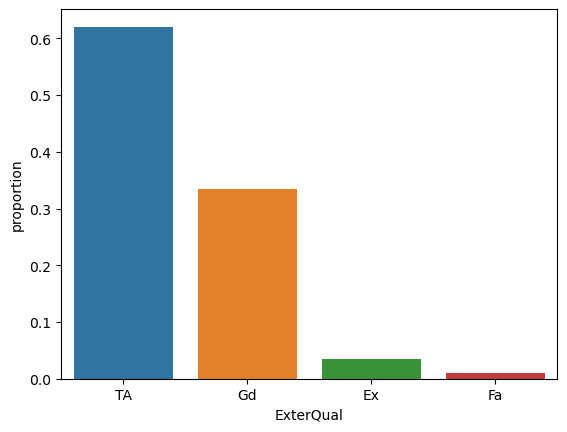

In [15]:
sns.barplot(x=hc['ExterQual'].value_counts().index,y=hc['ExterQual'].value_counts(normalize=True))

Porsi terbanyak berdasarkan output di atas adalah kelompok TA. Kelompok dengan porsi terkecil adalah 2.5Fin. Data kategorical ini lumayan imbalance karena hampir keseluruhan data berada pada kategori TA dan Gd. Sedangkan pada kategori lainnya sangat sedikit. 

Visualisasi Variabel Numerik SalePrice, GrLivArea dan PoolArea dengan Histogram

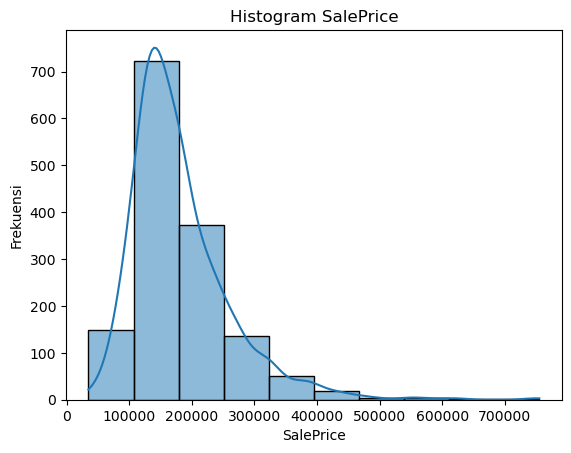

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=hn, x='SalePrice', bins=10, kde=True)
plt.title('Histogram SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frekuensi')
plt.show()

Pada histogram, terlihat distribusi data lebih condong ke kiri. Dari sini terlihat bahwa mean lebih kecil dari pada median

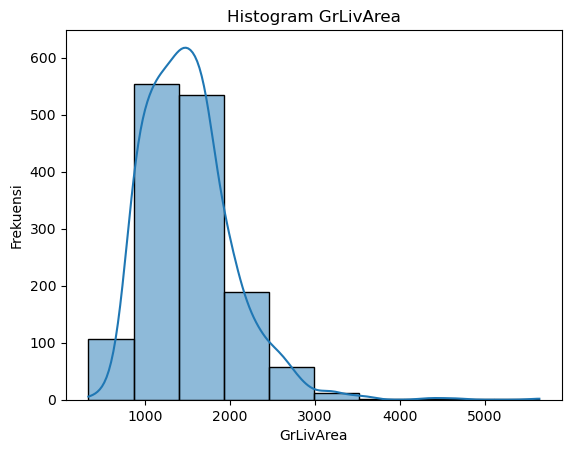

In [17]:
sns.histplot(data=hn, x='GrLivArea', bins=10, kde=True)
plt.title('Histogram GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frekuensi')
plt.show()

Pada histogram, terlihat distribusi data lebih condong ke kiri. Dari sini terlihat bahwa mean lebih kecil dari pada median

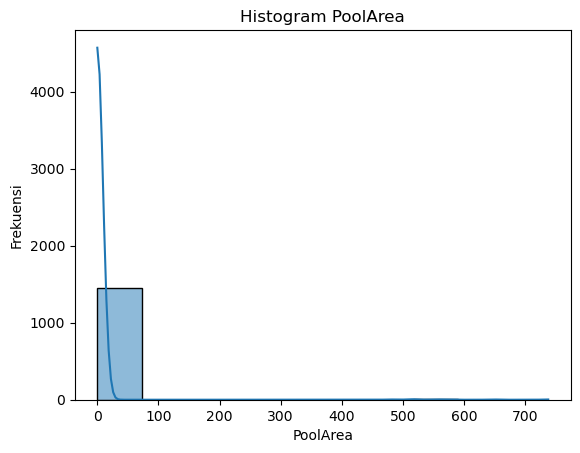

In [18]:
sns.histplot(data=hn, x='PoolArea', bins=10, kde=True)
plt.title('Histogram PoolArea')
plt.xlabel('PoolArea')
plt.ylabel('Frekuensi')
plt.show()

Nilai Frekuensi yang ada di Histogram pada PoolArea hanya berada pada rentang 0-100. Hal ini dikarenakan semua nilainya 0

In [19]:
hn['PoolArea']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, Length: 1460, dtype: int64

# Transformasi Variabel

In [20]:
#List kolom variabel kategorikal
hn.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Transformasi pada variabel SalePrice dan LotArea

Median: 5.212187604403958
Mean: 5.221978956475628
Std Dev: 0.17347974217176843


C:\Users\alfar\AppData\Local\Temp\ipykernel_13020\3647432234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spt, axlabel=spt.name)


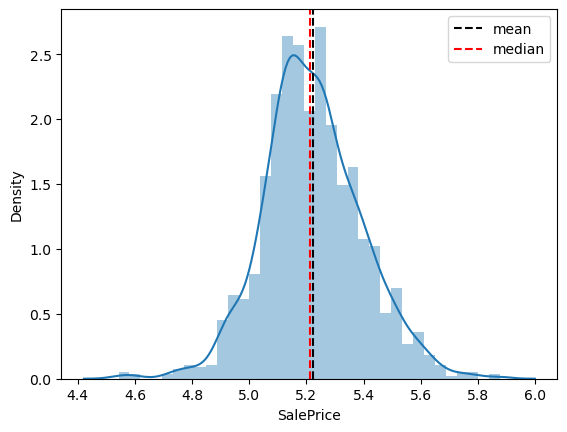

In [21]:
spt = np.log10(hn['SalePrice'])
sns.distplot(spt, axlabel=spt.name)
line1 = plt.axvline(spt.mean(), color='k', linestyle='--', label="mean")
line2 = plt.axvline(spt.median(), color='r', linestyle='--', label="median")
plt.legend(handles=[line1, line2], loc=1)  # Membuat legenda setelah plotting garis
print("Median:", spt.median())
print("Mean:", spt.mean())
print("Std Dev:", spt.std())
plt.show()

Berdasarkan output yang diberikan:

1. Data yang ditransformasi secara logaritmik cenderung memiliki distribusi yang lebih simetris, dengan mean dan median yang relatif dekat.
2. Standar deviasi yang rendah menunjukkan bahwa data tidak terlalu tersebar di sekitar mean.
3. Skew yang sedikit ke kanan (mean lebih besar dari median) mungkin menunjukkan bahwa meskipun transformasi telah membantu, masih ada sedikit skewing (Skew ke kanan).

C:\Users\alfar\AppData\Local\Temp\ipykernel_13020\1976899408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lpt, axlabel=lpt.name)


Median: 3.976739608981439
Mean: 3.9567867729303967
Std Dev: 0.22472484072511575


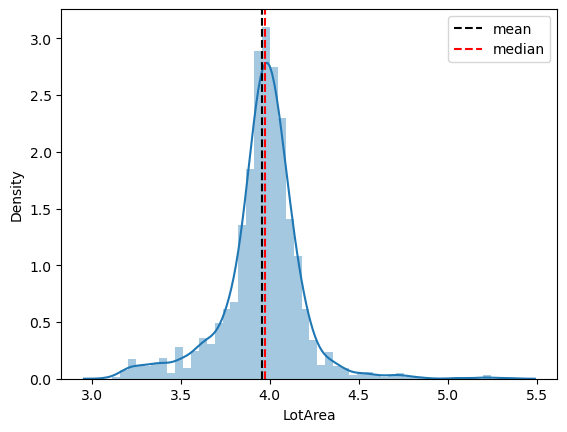

In [22]:
lpt = np.log10(hn['LotArea'])
sns.distplot(lpt, axlabel=lpt.name)
line1 = plt.axvline(lpt.mean(), color='k', linestyle='--', label="mean")
line2 = plt.axvline(lpt.median(), color='r', linestyle='--', label="median")
plt.legend(handles=[line1, line2], loc=1)  # Membuat legenda setelah plotting garis
print("Median:", lpt.median())
print("Mean:", lpt.mean())
print("Std Dev:", lpt.std())
plt.show()

Berdasarkan output yang diberikan:

1. Data yang ditransformasi secara logaritmik cenderung memiliki distribusi yang lebih simetris, dengan mean dan median yang relatif dekat.
2. Standar deviasi yang rendah menunjukkan bahwa data tidak terlalu tersebar di sekitar mean.
3. Skew yang sedikit ke kiri (mean lebih kecil dari median) mungkin menunjukkan bahwa meskipun transformasi telah membantu, masih ada sedikit skewing (Skew ke kiri).

# 2D Visualization

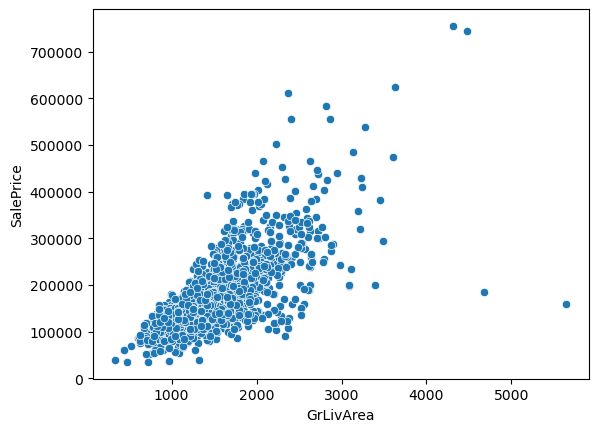

In [24]:
#Korelasi SalePrice dengan GrLivArea
grs=sns.scatterplot(y='SalePrice',x='GrLivArea',data=hn)

Dari output di atas, dapat dilihat bahwa variabel 'SalePrice' memiliki korelasi positif dengan variabel GrLivArea dikarenakan plot plot data membentuk garis yang cenderung ke atas, yang artinya semakin meningkat nilai SalePrice, maka semakin meningkat pula GrLivArea. 

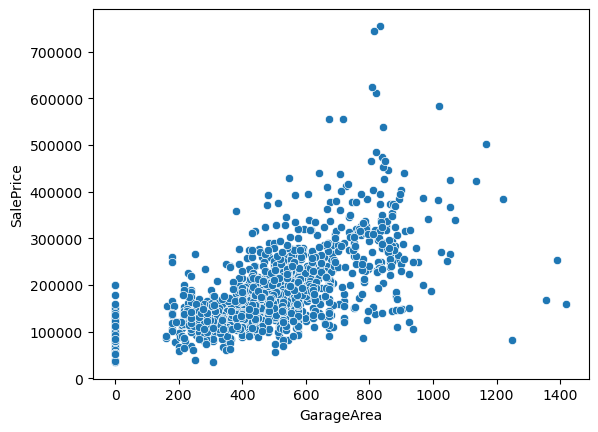

In [25]:
#Korelasi SalePrice dengan GarageArea
gas=sns.scatterplot(y='SalePrice',x='GarageArea',data=hn)

Dari output di atas, dapat dilihat bahwa variabel 'SalePrice' memiliki korelasi positif dengan variabel 'GarageArea' dikarenakan plot plot data membentuk garis yang cenderung ke atas, yang artinya semakin meningkat nilai 'SalePrice', maka semakin meningkat pula 'GarageArea'.Namun korelasi ini bersifat lemah dikarenakan masih banyak data yang tersebar 